# LOSS VISUALIZER

The main objective of this notebook is to visualize and analyze how the transformers model loss behaves during training. The notebook is divided into two main sections:

## FILTERED OSCAR DATASET VISUALIZATION

The loss ploted in this notebook is the cross entropy loss of the model. It must be said that due to using different training datasets the steps between 1470 and 6930 will be not displayed as it comes from a different text. The decision of just plotting this data is that the text from the dataset was used in the first and last epochs of the training.

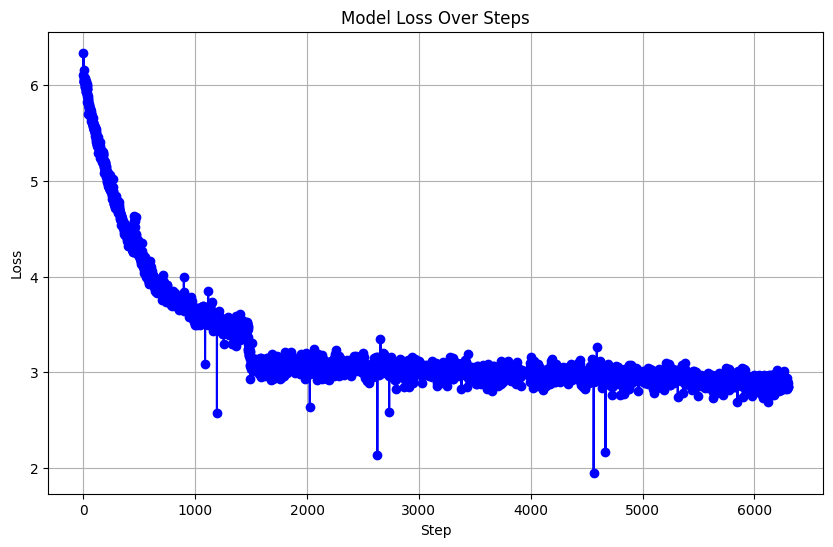

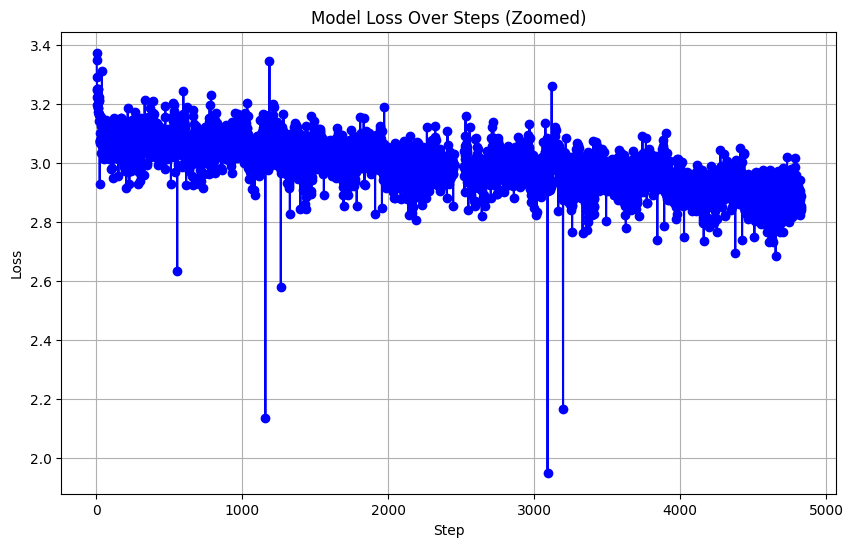

In [9]:
import matplotlib.pyplot as plt

# Open the log file and read lines
with open('output.txt', 'r') as file:
    lines = file.readlines()

steps = []
final_steps = []
losses = []
final_losses = []

# Process each line in the log file
for line in lines:
    parts = line.split('|')
    if len(parts) < 2:
        continue  # Skip lines that don't have the expected format

    step_part = parts[0].strip()
    loss_part = parts[1].strip()
    
    step = int(step_part.split()[1])
    loss = float(loss_part.split(':')[1].strip())  # Changed to split()[1] to handle the correct part of the loss

    if step <= 1470:
        steps.append(step)
        losses.append(loss)
    elif step > 6930:
        if step > 12000:
            step -= 1400
        steps.append(step-5460)
        final_steps.append(step-6930)
        losses.append(loss)
        final_losses.append(loss)


for plot, loss in [(steps, losses), (final_steps, final_losses)]:
    zoom = '' if loss == losses else ' (Zoomed)'
    plt.figure(figsize=(10, 6))
    plt.plot(plot, loss, marker='o', linestyle='-', color='b')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.title(f'Model Loss Over Steps{zoom}')
    plt.grid(True)
    plt.show()

Due to there was not an evaluation dataset the loss is calculated using the training dataset. This is not the best practice but it is useful to see how the model is learning. Due to the bad quality of the text, patrons can be seen in the loss plot.

## PATUFET DATASET VISUALIZATION

After training with the other common datasets and now that the model is capable of understanding basic catalan text, it was trained with the sinthetic data created by pauhidalgo in the patufet dataset, which has very accuracte and useful text including most of the real world topics that a model should know. The loss while training with this dataset is displayed in the plot.

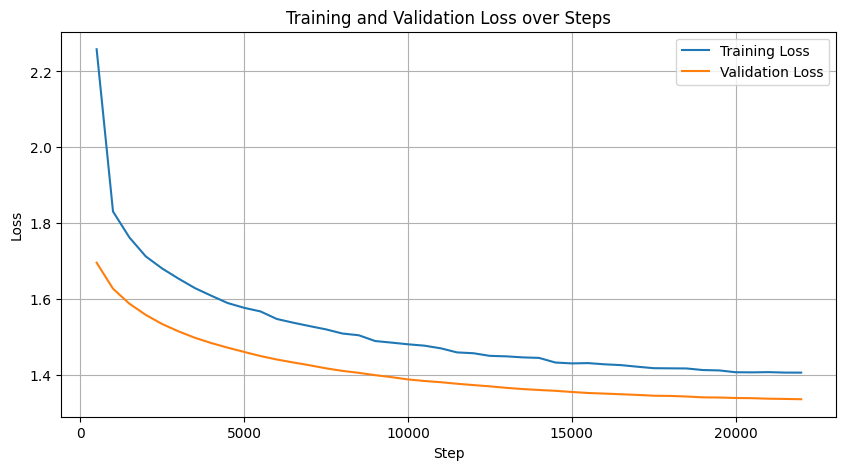

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Manual data for the training and validation loss

data = {
    'Step': [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500, 15000, 15500, 16000, 16500, 17000, 17500, 18000, 18500, 19000, 19500, 20000, 20500, 21000, 21500, 22000],
    'Training Loss': [2.258700, 1.830900, 1.762500, 1.712500, 1.680700, 1.653900, 1.629000, 1.608900, 1.589600, 1.577100, 1.567500, 1.547600, 1.537800, 1.528800, 1.520200, 1.509300, 1.504700, 1.489500, 1.485300, 1.480900, 1.477300, 1.470300, 1.459500, 1.457300, 1.450400, 1.449100, 1.446400, 1.445000, 1.432800, 1.430500, 1.431300, 1.428100, 1.426000, 1.421800, 1.417900, 1.417500, 1.417200, 1.413000, 1.412000, 1.407200, 1.406900, 1.407500, 1.406300, 1.406200],
    'Validation Loss': [1.695960, 1.627433, 1.587920, 1.558372, 1.534286, 1.514951, 1.498031, 1.484078, 1.472025, 1.460783, 1.449929, 1.440753, 1.433023, 1.425617, 1.417528, 1.410825, 1.405627, 1.399505, 1.394262, 1.388260, 1.384206, 1.380980, 1.376855, 1.373372, 1.370000, 1.366082, 1.362907, 1.360436, 1.358260, 1.355197, 1.352513, 1.350940, 1.349197, 1.347460, 1.345321, 1.344797, 1.343261, 1.340988, 1.340550, 1.339363, 1.33884, 1.337469, 1.336856, 1.336090]
}

df = pd.DataFrame(data)

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(df['Step'], df['Training Loss'], label='Training Loss')
plt.plot(df['Step'], df['Validation Loss'], label='Validation Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Steps')
plt.legend()
plt.grid(True)
plt.show()

As it can be seen the model was trained until convergence which took around 8 epochs. The loss was decreasing in a very stable way and the model was able to learn the text from the patufet dataset where both the training and evaluation loss were decreasing equally.